In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('show_data.csv')
data.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image,original_image
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.


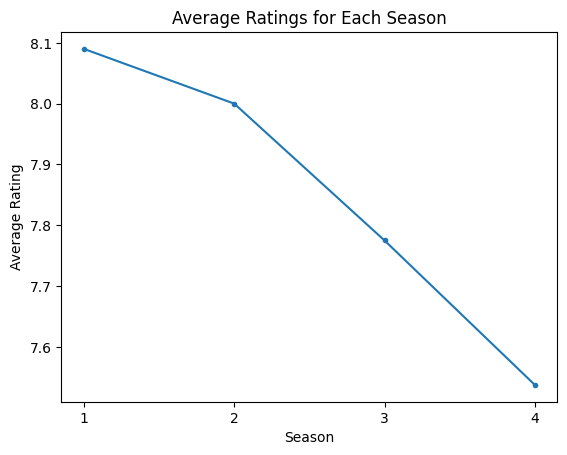

In [ ]:
# getting the averating rating for each season
season_ratings = data.groupby('season')['average_rating'].mean()

# Plotting the ratings for each season
season_ratings.plot(kind='line',xticks=(1,2,3,4),style='.-')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Season')
plt.show()


# Get all the episode names, whose average rating is more than 8 for every season


In [ ]:
episode_gt_8_rating = data[data.average_rating > 8]
print(len(episode_gt_8_rating))
episode_gt_8_rating[['season','name','average_rating']]

6


,season,name,average_rating
6,1,Trompe L'Oeil,8.6
8,1,The Well-Tempered Clavier,8.5
9,1,The Bicameral Mind,8.7
17,2,Kiksuya,8.7
18,2,Vanishing Point,8.4
19,2,The Passenger,8.5


# Get all the episode names that aired before May 2019 


In [ ]:
episodes_before_may_2019 = data[pd.to_datetime(data.airdate) < pd.to_datetime('2019-05-01')]
episodes_before_may_2019[['name','airdate']]

,name,airdate
0,The Original,2016-10-02
1,Chestnut,2016-10-09
2,The Stray,2016-10-16
3,Dissonance Theory,2016-10-23
4,Contrapasso,2016-10-30
5,The Adversary,2016-11-06
6,Trompe L'Oeil,2016-11-13
7,Trace Decay,2016-11-20
8,The Well-Tempered Clavier,2016-11-27
9,The Bicameral Mind,2016-12-04


# Get the episode name from each season with the highest and lowest rating

In [ ]:
highest_rated_episodes = data.groupby('season')['average_rating'].idxmax()
lowest_rated_episodes = data.groupby('season')['average_rating'].idxmin()
highest_rated_episodes_names = data.loc[highest_rated_episodes, ['season', 'name','average_rating']]
lowest_rated_episodes_names = data.loc[lowest_rated_episodes, ['season', 'name','average_rating']]
print('Highest rated episode name')
print(highest_rated_episodes_names)
print('Lowest rated episode name')
print(lowest_rated_episodes_names)

Highest rated episode name
    season                name  average_rating
9        1  The Bicameral Mind             8.7
17       2             Kiksuya             8.7
20       3        Parce Domine             8.0
32       4            Zhuangzi             7.8
Lowest rated episode name
    season          name  average_rating
2        1     The Stray             7.6
14       2  Akane No Mai             7.6
25       3   Decoherence             7.5
28       4  The Auguries             7.1


# Get the summary for the most popular ( ratings ) episode in every season

In [ ]:
most_popular_episode = data.groupby('season')['average_rating'].idxmax()
summary = data.loc[most_popular_episode,['name','summary','average_rating']]
print(summary)

                  name                                            summary  \
9   The Bicameral Mind  Delores finds out the truth about William's fa...   
17             Kiksuya  Another of Westworld's Host revolutionaries is...   
20        Parce Domine  If you're stuck in a loop, try walking in a st...   
32            Zhuangzi                                      God is bored.   

    average_rating  
9              8.7  
17             8.7  
20             8.0  
32             7.8  
